<a href="https://colab.research.google.com/github/JoaoxCorreia/Dados-IA-Trabalhos/blob/main/techchallenge_fase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# POSTECH - TECH CHALLENGE - FASE 2
## Apresentação
A gestão eficiente da carga de trabalho dos funcionários é essencial para o sucesso empresarial, mas enfrenta desafios como sobrecarga, distribuição desigual de tarefas e falta de visibilidade. A resolução desses problemas pode trazer benefícios significativos, como aumento da produtividade, melhoria do bem-estar dos funcionários e otimização de recursos, proporcionando uma vantagem competitiva no mercado.
## Desafio
Otimização de balanceamento de carga de trabalho entre trabalhadores.
## Problema
Consiste em distribuir um conjunto de tarefas, cada uma com uma duração específica, entre um número fixo de trabalhadores de tal forma que o tempo total de execução (ou carga de trabalho) do trabalhador mais ocupado seja minimizado.
### Resolução do problema
O problema pode ser descrito da seguinte forma:
- **Tarefas**: Uma lista de tarefas, onde cada tarefa tem uma duração específica.
- **Trabalhadores**: Um número fixo de trabalhadores.
- **Objetivo**: Distribuir as tarefas entre os trabalhadores de modo que o tempo total de execução do trabalhador mais ocupado seja o menor possível.

# Solução
O algoritmo genético utilizado para resolver este problema é implementado usando a biblioteca DEAP (Distributed Evolutionary Algorithms in Python).

In [ ]:
import random
import matplotlib.pyplot as plt
import pandas as pd
from deap import base, creator, tools, algorithms

Definição das tarefas:

In [ ]:
# Cada elemento da lista de tarefas representa uma tarefa a ser executada em horas
tasks = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
tasks.extend(tasks)
tasks.extend(tasks)
tasks.extend(tasks)
tasks.extend(tasks)
tasks.extend(tasks)
tasks.extend(tasks)

# Utillizado o extend para duplicar a lista de tarefas a cada chamada da função
print(f'Quantidade de tarefas: {len(tasks)}')

Quantidade de tarefas: 640


Definição do número de traballhadores:

In [ ]:
num_workers = 3

Função de criação de indivíduos:

In [ ]:
def create_individual():
    return [random.randint(0, num_workers - 1) for _ in range(len(tasks))]

Função de avaliação:

In [ ]:
def evaluate(individual):
    worker_times = [0] * num_workers
    for task, worker in zip(tasks, individual):
        worker_times[worker] += task
    return max(worker_times),

Função para registrar a evolução do melhor fitness

In [ ]:
def record_best_fitness(population):
    best_individual = tools.selBest(population, k=1)[0]
    best_fitness = evaluate(best_individual)[0]
    best_fitness_values.append(best_fitness)

Criando a classe Fitness e o indivíduo

In [ ]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,)) # Utilizado o -1.0 para minimizar o tempo total de execução
creator.create("Individual", list, fitness=creator.FitnessMin) # Utilizado o FitnessMin para minimizar o tempo total de execução

Configurando a toolbox do DEAP

In [ ]:
toolbox = base.Toolbox() # Utilizado para armazenar funções que serão utilizadas no algoritmo genético
toolbox.register("individual", tools.initIterate, creator.Individual, create_individual) # Utilizado para criar um indivíduo da população
toolbox.register("population", tools.initRepeat, list, toolbox.individual) # Utilizado para criar uma população de indivíduos
toolbox.register("mate", tools.cxTwoPoint) # Utilizado para realizar o crossover onde o cxTwoPoint é o crossover de dois pontos
toolbox.register("mutate", tools.mutUniformInt, low=0, up=num_workers - 1, indpb=0.2) # Utilizado para realizar a mutação onde o indpb é a probabilidade de mutação
toolbox.register("select", tools.selTournament, tournsize=3) # Utilizado para realizar a seleção onde o tournsize é o número de indivíduos no torneio
toolbox.register("evaluate", evaluate)

Parâmetros do algoritmo genético

In [ ]:
population_size = 10 # Tamanho da população
num_generations = 30 # Número de gerações
crossover_prob = 0.7 # Probabilidade de crossover
mutation_prob = 0.2 # Probabilidade de mutação

Criação da população inicial

In [ ]:
population = toolbox.population(n=population_size)

Execução do algoritmo genético

In [ ]:
best_fitness_values = [] # Utilizado para armazenar o melhor tempo total de execução de cada geração

# Executando o algoritmo genético
for gen in range(num_generations): # Utilizado para percorrer as gerações
    population = algorithms.varAnd(population, toolbox, cxpb=crossover_prob, mutpb=mutation_prob) # Utilizado para realizar o crossover e a mutação na população
    fits = toolbox.map(toolbox.evaluate, population) # Utilizado para calcular o fitness de cada indivíduo da população
    for fit, ind in zip(fits, population): # Utilizado para atribuir o fitness de cada indivíduo da população
        ind.fitness.values = fit
    population = toolbox.select(population, k=len(population)) # Utilizado para selecionar os indivíduos da população que irão para a próxima geração
    record_best_fitness(population) # Utilizado para armazenar o melhor tempo total de execução de cada geração

# Encontrando o melhor indivíduo
best_individual = tools.selBest(population, k=1)[0] # Utilizado para encontrar o melhor indivíduo da população
best_fitness = evaluate(best_individual)[0] # Utilizado para calcular o fitness do melhor indivíduo

Criando gráficos para visualização dos resultados

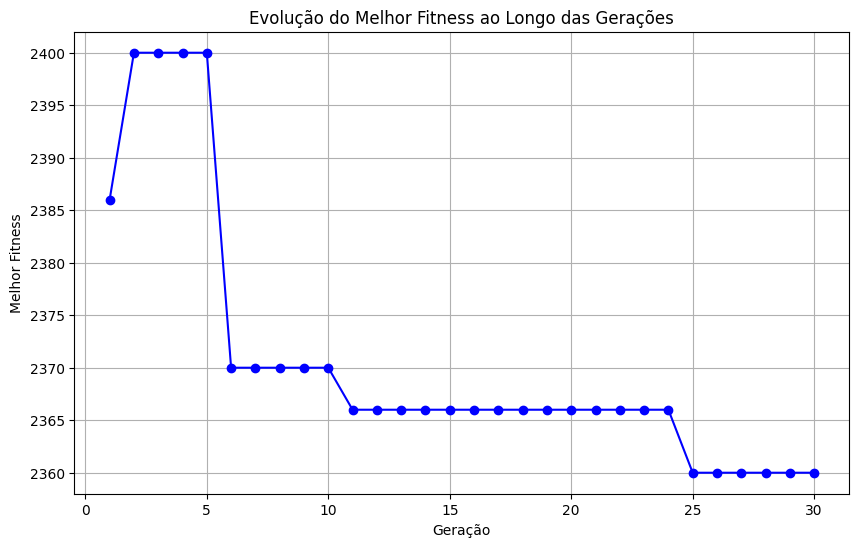

Melhor indivíduo: [2, 1, 1, 2, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 2, 1, 2, 2, 0, 0, 2, 1, 0, 1, 2, 1, 2, 0, 0, 1, 1, 2, 2, 1, 2, 0, 2, 1, 0, 1, 0, 2, 1, 2, 2, 0, 0, 2, 1, 2, 1, 2, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 2, 0, 1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 0, 0, 1, 2, 1, 2, 0, 2, 2, 2, 0, 2, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 1, 0, 0, 2, 0, 1, 0, 1, 2, 2, 2, 0, 0, 1, 0, 1, 1, 2, 1, 2, 0, 0, 0, 2, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 0, 1, 1, 1, 2, 0, 1, 1, 0, 1, 2, 1, 1, 2, 0, 1, 2, 2, 2, 1, 0, 0, 1, 2, 0, 1, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 1, 2, 2, 0, 2, 2, 1, 2, 1, 1, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 0, 0, 1, 2, 1, 2, 1, 1, 2, 0, 1, 1, 0, 2, 2, 2, 0, 1, 0, 0, 2, 0, 0, 1, 2, 1, 0, 2, 1, 1, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 1, 1, 2, 0, 0, 1, 0, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 0, 2, 2, 1, 0, 2, 0, 0, 1, 1, 1, 0, 2, 1, 1, 2, 0, 1, 0, 0, 1, 0, 2, 0, 0, 2, 0, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 1, 0, 0, 0, 1, 1, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 0, 

In [ ]:
# Criando um DataFrame para armazenar os dados
df = pd.DataFrame({
    'Geração': range(1, num_generations + 1),
    'Melhor Fitness': best_fitness_values
})

# Plotando a evolução do melhor fitness
plt.figure(figsize=(10, 6))
plt.plot(df['Geração'], df['Melhor Fitness'], marker='o', linestyle='-', color='b')
plt.title('Evolução do Melhor Fitness ao Longo das Gerações')
plt.xlabel('Geração')
plt.ylabel('Melhor Fitness')
plt.grid(True)
plt.show()

# Exibindo os resultados
print("Melhor indivíduo:", best_individual)
print("Melhor tempo total de execução:", best_fitness)

### Resultados
- O melhor indivíduo encontrado representa a distribuição de tarefas entre os trabalhadores que minimiza o tempo total de execução do trabalhador mais ocupado.
- O melhor tempo total de execução é exibido, e a evolução do melhor fitness ao longo das gerações é plotada.